In [2]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import sklearn.naive_bayes as nb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
#read the data
data=pd.read_csv("bankchurn.csv")
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f'{data.shape[0]} samples and {data.shape[1]} features in the insurance  dataset.')

10000 samples and 13 features in the insurance  dataset.


In [5]:
#view data types
data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
#view statistical information.
data.describe([0.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
99%,1.581311e+07,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# checking null-values in dataset
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#checking for duplicate values
data[data.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
# checking Unique
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography             11
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
data.Geography= np.where((data["Geography"]=="fra")|(data["Geography"]=="france"),"France",data.Geography)
data.Geography= np.where((data["Geography"]=="espanio")|(data["Geography"]=="spain"),"Spain",data.Geography)
data.Geography= np.where((data["Geography"]=="GERMANY")|(data["Geography"]=="gernamy")|((data["Geography"]=="germany")|((data["Geography"]=="ger"))),"Germany",data.Geography)

In [14]:
bank_data=data.copy()

In [15]:
#dropping the un-neccesary columns
bank_data = bank_data.drop(['CustomerId','Surname'], axis = 1)

In [16]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

### 1)spearating categorical and numerical columns

In [17]:
def separate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique()<10:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous

In [18]:
categorical,continuous=separate_data_types(bank_data)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical     continuous
--------------  ---------------
Geography       CreditScore
Gender          Age
NumOfProducts   Tenure
HasCrCard       Balance
IsActiveMember  EstimatedSalary
Exited


### Appending CAT to CAT misplaced in NUM

In [19]:
#continuous.remove("Geography")
#categorical.append("Geography")

In [20]:
from tabulate import tabulate
table = [categorical,continuous]
print(tabulate({'categorical':categorical,
                'continuous': continuous}, headers = ['categorical','continuous']))

categorical     continuous
--------------  ---------------
Geography       CreditScore
Gender          Age
NumOfProducts   Tenure
HasCrCard       Balance
IsActiveMember  EstimatedSalary
Exited


## Identify Outliers

In [21]:
print('row and columns before removing outliers:',bank_data.shape)
print('wait till shape after removing outlier is printed...')

def myOutliers(data1,col):
    q3=np.quantile(data1[col],0.75)
    q1=np.quantile(data1[col],0.25)
    iqr=q3-q1
    
    global mylist
    global my_outlier_data
    
    lower_range=q1-1.5*iqr
    upper_range=q3+1.5*iqr 
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist=[x for x in data1[col] if ((x<lower_range)|(x>upper_range))]
    print('total outliers in',col,'are',len(mylist))
    my_outlier_data=data1.loc[data1[col].isin(mylist)]

row and columns before removing outliers: (10000, 11)
wait till shape after removing outlier is printed...


In [22]:
for i in continuous:
    print('i is',i)
    myOutliers(bank_data,i)
    print('***************************************************')

i is CreditScore
the lower range of CreditScore is 383.0
the upper range of CreditScore is 919.0
total outliers in CreditScore are 15
***************************************************
i is Age
the lower range of Age is 14.0
the upper range of Age is 62.0
total outliers in Age are 359
***************************************************
i is Tenure
the lower range of Tenure is -3.0
the upper range of Tenure is 13.0
total outliers in Tenure are 0
***************************************************
i is Balance
the lower range of Balance is -191466.36000000002
the upper range of Balance is 319110.60000000003
total outliers in Balance are 0
***************************************************
i is EstimatedSalary
the lower range of EstimatedSalary is -96577.09624999999
the upper range of EstimatedSalary is 296967.45375
total outliers in EstimatedSalary are 0
***************************************************


### Removing Outliers

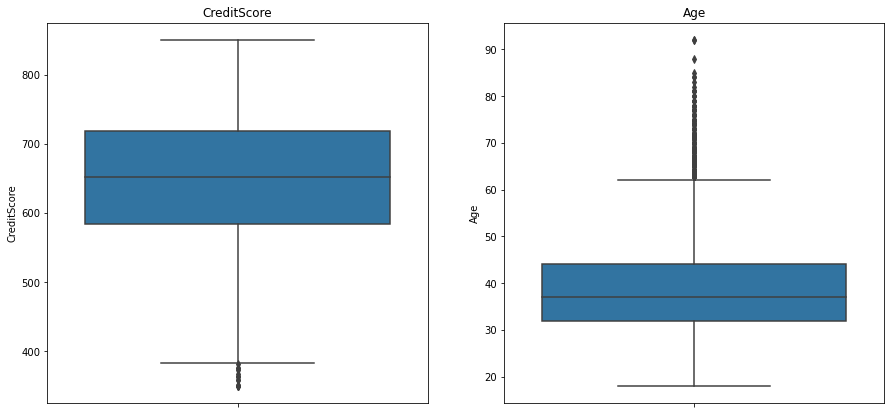

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(y=bank_data['CreditScore'],ax=ax[0]).set(title='CreditScore')
sns.boxplot(y=bank_data['Age'],ax=ax[1]).set(title='Age')
plt.show()

In [24]:
#bank_data=bank_data[(bank_data['CreditScore']>=300) & (bank_data["CreditScore"]<=850)]

In [25]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
# encoding sex column
bank_data.replace({'Gender':{'Male':0,'Female':1}}, inplace=True)

# encoding 'region' column
bank_data.replace({'Geography':{'France':0,'Germany':1,'Spain':2}}, inplace=True)



In [27]:
X = bank_data.drop(columns='Exited', axis=1)
Y = bank_data['Exited']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 10) (8000, 10) (2000, 10)


In [30]:
## User defined function for accuracy report

def confusionMatrix(df):
    #accuracy score
    print("Accuracy Score = {}".format(accuracy_score(df.actual,df.predicted)))
    print("\n")
    #Confusion Matrix
    print("Confusion Matrix")
    print(pd.crosstab(df.actual,df.predicted,margins=True))
    print("\n")
    #Classification Report
    print("Calssification Report\n",classification_report(df.actual, df.predicted))
    
    # ROC /AUC
    fpr,tpr,_=metrics.roc_curve(df.actual,df.predicted)
    area_under_curve=metrics.auc(fpr,tpr)
    
    #plot the ROC
    
    plt.title("Receptive Characterstic Curve")
    plt.plot(fpr,tpr,'b',label="AUC="+str(area_under_curve))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--') #dummy model
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()

## RandomForestClassifier

In [31]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)
y_RFC=model.predict(X_test)
y_RFC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
acc_RFC=accuracy_score(Y_test, y_RFC)

In [33]:
df=pd.DataFrame({'actual':Y_test,'predicted':y_RFC.flatten(),'True/false':Y_test==y_RFC})
df

,actual,predicted,True/false
7878,1,0,False
3224,1,0,False
1919,1,0,False
4432,0,0,True
4835,0,0,True
...,...,...,...
9073,1,0,False
8584,0,0,True
5390,1,0,False
5092,1,0,False


Accuracy Score = 0.8615


Confusion Matrix
predicted     0    1   All
actual                    
0          1566   51  1617
1           226  157   383
All        1792  208  2000


Calssification Report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1617
           1       0.75      0.41      0.53       383

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



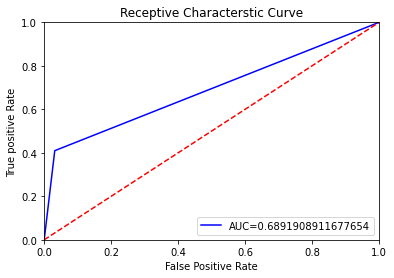

None


In [34]:
print(confusionMatrix(df))

In [35]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, y_RFC)
# calculate AUC
auc = roc_auc_score(Y_test, y_RFC)
print('AUC: %.3f' % auc)

AUC: 0.689


In [36]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

In [37]:
# predict probabilities
lr_probs = model.predict_proba(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.842


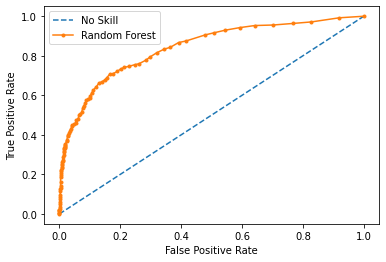

In [38]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1 ]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## final result 

In [39]:
predi=model.predict(X)

In [40]:
predi

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [41]:
a=pd.DataFrame({'Prediction':predi},index=None)

In [42]:
final=pd.concat([data,a],axis=1)

In [44]:
final

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Prediction
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [45]:
#final.to_csv("final.csv")